## Латиков Александр, задача ?.1

Задача - необходимо решить диффур:

du/dt = d/dx(u*du/dx)

0<x<1 и 0<t<=1

u(t = 0) = (1 + x)^2 / 7

u(x = 0) = 1 / (7 - 6t)

u(x = 1) = 4 / (7 - 6t)

In [33]:
import numpy as np              
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [34]:
def ut0(x):
    return (1 + x) ** 2 / 7

def ux0(t):
    return 1 / (7 - 6 * t)

def ux1(t):
    return 4 / (7 - 6 * t)

In [35]:
h = 0.001
t = 0.001
Nt = 1000
Nx = 1000
eps = 1e-4

x_start = 0.0
x_end = 1.0
t_start = 0.0
t_end = 1.0
eps = 1e-4

In [36]:
def pr_solve(A, f):
    n = f.size
    y = np.zeros(n, dtype = float)
    a = np.zeros(n, dtype = float)
    b = np.zeros(n, dtype = float)
    
    a[0] = A[0][0]
    b[0] = f[0]
    for i in range(1, n):
        a[i] = A[i][i] - A[i][i - 1] / a[i - 1] * A[i - 1][i]
        b[i] = f[i] - A[i][i - 1] / a[i - 1] * b[i - 1]
        
    y[n - 1] = b[n - 1] / a[n - 1]
    for i in range(1, n):
        j = n - 1 - i
        y[j] = (b[j] - A[j][j + 1] * y[j + 1]) / a[j]
        
    return y

In [37]:
A = np.array([[1.0, 1.0, 0], [1.0, 2.0, 1.0], [0, 1.0, 2.0]])
f = np.array([2.0, 4.0, 3.0])

y = pr_solve(A, f)
print(y)

[1. 1. 1.]


In [48]:
data = np.zeros(Nt * (Nx + 1), dtype = float).reshape(Nt, Nx + 1)
ux_prev = np.arange(Nx + 1, dtype = float)
ux_prev = ux0(ux_prev * h)
err = eps + 1.0

for i in range(Nt):
    print(i, err, eps)
    while(err > eps):
        print(i, err)
        A = np.zeros((Nx - 1) ** 2, dtype = float).reshape(Nx - 1, Nx - 1)
        f = np.zeros(Nx - 1, dtype = float)
        for j in range(Nx - 1):
            A[j][j] = 1 / t + (ux_prev[j] + 2 * ux_prev[j + 1] + ux_prev[j + 2]) / (2 * h ** 2)
            f[j] = ux_prev[j + 1] / t
        for j in range(1, Nx - 1):
            A[j][j - 1] = -(ux_prev[j] + ux_prev[j + 1]) / (2 * h ** 2)
        for j in range(Nx - 2):
            A[j][j + 1] = -(ux_prev[j + 1] + ux_prev[j + 2]) / (2 * h ** 2)
        f[0] += ux0((i + 1) * t) * (ux_prev[0] + ux_prev[1]) / (2 * h ** 2)
        f[Nx - 2] += ux1((i + 1) * t) * (ux_prev[Nx - 1] + ux_prev[Nx]) / (2 * h ** 2)

        d = pr_solve(A, f)
        ux_cur = np.zeros(Nx + 1, dtype = float)
        ux_cur[0] = ux0((i + 1) * t)
        for j in range(1, Nx):
            ux_cur[j] = d[j - 1]
        ux_cur[Nx] = ux1((i + 1) * t)
        err = 0.0
        for j in range (1, Nx):
            er = abs(ux_cur[j] - ux_prev[j])
            if(er > err):
                err = er
        ux_prev = np.copy(ux_cur)
            
    data[i] = np.copy(ux_cur)
    err = eps + 1.0


0 1.0001 0.0001
0 1.0001
0 0.4133189354292023
0 0.0553393943523397
0 0.029898810528993236
0 0.019628301359940425
0 0.014178392900225045
0 0.01084643114602768
0 0.008621764931504683
0 0.0070444998716485685
0 0.005876364351205643
0 0.004981457210541329
0 0.004277750924804313
0 0.0037123701221724037
0 0.003249936166760392
0 0.0028661168715509167
0 0.0025435398101367745
0 0.002269427359929299
0 0.0020342084101618862
0 0.0018308154276921451
0 0.0016535402505257757
0 0.001498041820572893
0 0.0013608473086988981
0 0.0012394383491492467
0 0.0011998148992468094
0 0.0011631080654239123
0 0.0011290039023477694
0 0.0010972307349890742
0 0.0010675744279079469
0 0.0010398084729287826
0 0.0010137713957623085
0 0.0009892934982652646
0 0.0009662442774669988
0 0.000944504060362783
0 0.000923963444881104
0 0.0009045226433401221
0 0.000886090782097726
0 0.0008686053800082139
0 0.0008519799859361132
0 0.0008361656635387793
0 0.000821091968958354
0 0.000806714000591513
0 0.0007929895261424846
0 0.0007798684

0 0.00018690689305955743
0 0.00018625430282009914
0 0.0001856035472503903
0 0.00018495462583795197
0 0.00018430753796866428
0 0.00018366228303245968
0 0.00018301886034438608
0 0.00018237726918063357
0 0.00018173750875100092
0 0.00018109957824635758
0 0.00018046347678485342
0 0.0001798292034614346
0 0.0001791967573145925
0 0.00017856613733008286
0 0.00017793734244087034
0 0.00017731037156915042
0 0.00017668522356312222
0 0.00017606189723345933
0 0.00017544039134559375
0 0.00017482070461960486
0 0.00017420283573660322
0 0.0001735867833363991
0 0.00017297254600801004
0 0.0001723601222990978
0 0.0001717495107281808
0 0.00017114070976004259
0 0.0001705337178116162
0 0.0001699285332819045
0 0.0001693251544944152
0 0.0001687235797708797
0 0.00016812380736691557
0 0.00016752583551460365
0 0.00016692966238446294
0 0.0001663352861404621
0 0.00016574270488689535
0 0.00016515191668287077
0 0.00016456291957583913
0 0.00016397571155135626
0 0.00016339029057876875
0 0.00016280665457218957
0 0.0001622

36 0.0005023475906715813
36 0.00013084094416249137
36 0.00010645996309610606
36 0.00010045807009151364
37 1.0001 0.0001
37 1.0001
37 0.0005032452755850958
37 0.0001310422197947636
37 0.0001065916929534616
37 0.00010055999494629209
38 1.0001 0.0001
38 1.0001
38 0.0005041455949190699
38 0.0001312513247437863
38 0.0001067364389537584
38 0.00010067792591439417
39 1.0001 0.0001
39 1.0001
39 0.0005050484821040868
39 0.00013146596460289484
39 0.00010689032570498913
39 0.00010080722822547461
40 1.0001 0.0001
40 1.0001
40 0.000505953897869893
40 0.0001316846595654786
40 0.00010705080525075239
40 0.0001009447734532376
41 1.0001 0.0001
41 1.0001
41 0.000506861819027371
41 0.00013190641676397163
41 0.00010721614276631986
41 0.00010108838882738613
42 1.0001 0.0001
42 1.0001
42 0.000507772232389736
42 0.00013213054962224469
42 0.00010738512485430896
42 0.00010123653138172095
43 1.0001 0.0001
43 1.0001
43 0.0005086851312633422
43 0.00013235657250920685
43 0.00010755688510100114
43 0.00010138808637272

96 0.00010440753129870028
96 0.00010090292251896393
97 1.0001 0.0001
97 1.0001
97 0.0005616001179903352
97 0.0001393198456763889
97 0.00010938344733202321
97 0.00010184854907402396
98 1.0001 0.0001
98 1.0001
98 0.000562836226602137
98 0.00014294487963528724
98 0.00011309944758741697
98 0.00010468196040769318
98 0.0001011314367361793
99 1.0001 0.0001
99 1.0001
99 0.0005637258378219379
99 0.00013980666618507165
99 0.00010972025868971613
99 0.00010211716689378925
100 1.0001 0.0001
100 1.0001
100 0.0005649685115525216
100 0.00014344550583111904
100 0.00011345402496065748
100 0.00010497130243858344
100 0.00010137799593201713
101 1.0001 0.0001
101 1.0001
101 0.0005658637301643177
101 0.00014030039098600344
101 0.00011006698905180468
101 0.00010239926880883932
102 1.0001 0.0001
102 1.0001
102 0.000567113002036046
102 0.00014395263007249692
102 0.00011381772709284643
102 0.00010527256355064019
102 0.00010163873410762303
103 1.0001 0.0001
103 1.0001
103 0.0005680138570973714
103 0.0001408001156

149 0.0006209641204059091
149 0.00015094795018810725
149 0.00011565491091736213
149 0.00010562020456073018
149 0.00010159233854500904
150 1.0001 0.0001
150 1.0001
150 0.0006221977276835711
150 0.00015123110108561377
150 0.00011585368034150445
150 0.0001057845238601196
150 0.00010173515988742832
151 1.0001 0.0001
151 1.0001
151 0.0006234350232826591
151 0.00015151585299710835
151 0.00011605448921914174
151 0.00010595147823633244
151 0.00010188114838638462
152 1.0001 0.0001
152 1.0001
152 0.0006246760192968326
152 0.00015180213122079067
152 0.0001162571966630832
152 0.00010612086444383717
152 0.00010203005231246287
153 1.0001 0.0001
153 1.0001
153 0.0006259207282820478
153 0.00015208987333237278
153 0.00011646168412771107
153 0.00010629251049631971
153 0.00010218165759889875
154 1.0001 0.0001
154 1.0001
154 0.0006271691631664078
154 0.00015237902681042303
154 0.00011666785093256138
154 0.00010646626967969475
154 0.00010233578077945005
154 0.00010008460381638606
155 1.0001 0.0001
155 1.00

198 1.0001 0.0001
198 1.0001
198 0.0006859280617677044
198 0.00016364537765856113
198 0.00012255512923586842
198 0.00010988035201620061
198 0.00010438777093912943
198 0.0001013826850250199
199 1.0001 0.0001
199 1.0001
199 0.0006872342070972648
199 0.00016137484517697587
199 0.00011981873814514987
199 0.00010752225667709503
199 0.00010261992652815799
199 0.00010010999910303742
200 1.0001 0.0001
200 1.0001
200 0.0006886480547620977
200 0.00016110838401273142
200 0.00011915063449274843
200 0.00010668800166990788
200 0.00010177477534811796
201 1.0001 0.0001
201 1.0001
201 0.0006902334875644733
201 0.0001645387204662896
201 0.00012308661366788876
201 0.00011024002710124936
201 0.00010463747913647126
201 0.00010155829119862236
202 1.0001 0.0001
202 1.0001
202 0.0006915533025912968
202 0.00016227984300909437
202 0.00012037834783407142
202 0.00010792100400536242
202 0.00010291524935845953
202 0.00010033380324414587
203 1.0001 0.0001
203 1.0001
203 0.000692981089505218
203 0.0001620295865353282

241 0.00010004067606772526
242 1.0001 0.0001
242 1.0001
242 0.000753185326964334
242 0.00017370063423527426
242 0.000126118062823255
242 0.0001110935956851744
242 0.00010467557830862173
242 0.00010132963973952247
243 1.0001 0.0001
243 1.0001
243 0.000754849160427784
243 0.00017451680565383487
243 0.00012703934362090497
243 0.00011205360095800643
243 0.00010559076840366277
243 0.00010214897345905971
244 1.0001 0.0001
244 1.0001
244 0.0007565080031013416
244 0.00017507149968765123
244 0.00012759548766172468
244 0.00011263806664230103
244 0.00010617684359615076
244 0.0001027111957919713
244 0.00010048262973549882
245 1.0001 0.0001
245 1.0001
245 0.0007580498242993894
245 0.00017277794645642608
245 0.0001244191133366046
245 0.00010944136214852129
245 0.00010336754642692458
245 0.0001003976497909731
246 1.0001 0.0001
246 1.0001
246 0.0007598030738407147
246 0.00017510467860526457
246 0.00012701602149567393
246 0.00011177240373239083
246 0.00010521741856672762
246 0.00010177243184084084
247 

282 0.00010331312016220728
282 0.0001008667085454773
283 1.0001 0.0001
283 1.0001
283 0.0008252347521187087
283 0.00018598334745001388
283 0.0001319371306927053
283 0.0001144357044338129
283 0.00010686208202126402
283 0.00010293226125213106
283 0.0001005283799518919
284 1.0001 0.0001
284 1.0001
284 0.0008271180509942244
284 0.00018625578602349258
284 0.0001319902691807595
284 0.00011437976040706843
284 0.00010674329940796312
284 0.00010278283704157065
284 0.00010036959665427059
285 1.0001 0.0001
285 1.0001
285 0.0008290100545851331
285 0.00018659205176441152
285 0.00013214079805479173
285 0.00011443877077088604
285 0.00010674376481101255
285 0.00010274690720479818
285 0.00010031126710685623
286 1.0001 0.0001
286 1.0001
286 0.0008309094804200834
286 0.00018695678470093124
286 0.0001323363135279365
286 0.0001145539084588254
286 0.000106806491899758
286 0.00010277416581572218
286 0.0001003142599290685
287 1.0001 0.0001
287 1.0001
287 0.0008328159107036104
287 0.00018733736113307753
287 0.

320 0.000108663832640854
320 0.00010400758814543831
320 0.00010121975528032401
321 1.0001 0.0001
321 1.0001
321 0.0009017311004521078
321 0.0002010250263601021
321 0.00014056234747727991
321 0.00012025055014486252
321 0.00011101516051537086
321 0.00010600350275380421
321 0.00010287723893109835
321 0.00010068773486460181
322 1.0001 0.0001
322 1.0001
322 0.0009038068062929838
322 0.0001996178896878087
322 0.00013845148467550583
322 0.00011806758851140575
322 0.00010903637539938504
322 0.00010432706159579919
322 0.00010149923339486389
323 1.0001 0.0001
323 1.0001
323 0.000906049726967173
323 0.00020194072925072692
323 0.00014116096333816053
323 0.00012072196007073543
323 0.00011141351705390434
323 0.00010635114994228534
323 0.00010318644314100123
323 0.00010096635937528742
324 1.0001 0.0001
324 1.0001
324 0.0009081407280235876
324 0.00020053386498075643
324 0.00013904794988817137
324 0.00011853999003386129
324 0.00010943809239205571
324 0.00010468039568223286
324 0.00010181560238986531
32

355 0.00011258739120689754
355 0.00010683666770250344
355 0.00010333199654588565
355 0.00010095222783745861
356 1.0001 0.0001
356 1.0001
356 0.0009818871931787099
356 0.00021490192334350233
356 0.00014723406436312203
356 0.0001240513562024148
356 0.00011337751901452364
356 0.00010758723078418964
356 0.00010402335144976682
356 0.00010157630565854614
357 1.0001 0.0001
357 1.0001
357 0.0009843397530623355
357 0.0002155430404016112
357 0.00014776316636566644
357 0.0001245635485193075
357 0.00011388209900331514
357 0.000108080397147714
357 0.00010449684834423767
357 0.00010202494776778703
357 0.00010015904869686842
358 1.0001 0.0001
358 1.0001
358 0.0009867209443957803
358 0.00021414842136591172
358 0.00014548924698210008
358 0.00012201674656120431
358 0.00011137686595652507
358 0.0001057812238152156
358 0.00010246627580168255
358 0.00010026047205724531
359 1.0001 0.0001
359 1.0001
359 0.000989247137560434
359 0.00021608374651171935
359 0.00014766991418613262
359 0.0001241465374028916
359 0

387 0.00011553376699535711
387 0.00010888993374624789
387 0.00010484300562108029
387 0.0001021214508543089
387 0.00010012342763809912
388 1.0001 0.0001
388 1.0001
388 0.0010648919447295846
388 0.00022939368380647807
388 0.00015422765908634783
388 0.00012797622066218484
388 0.00011571369606033777
388 0.00010903004011209028
388 0.00010495217182604488
388 0.00010220649909298274
388 0.00010018946414147578
389 1.0001 0.0001
389 1.0001
389 0.0010676560353237718
389 0.00022995534108227744
389 0.00015457011344299776
389 0.00012822854910388148
389 0.00011591294296797727
389 0.0001091921471938484
389 0.0001050854946584856
389 0.00010231742915234321
389 0.00010028196209233009
390 1.0001 0.0001
390 1.0001
390 0.0010704310091759206
390 0.00023052387328947876
390 0.0001549219039455041
390 0.00012849290185434903
390 0.00011612659460280561
390 0.00010937075980399502
390 0.00010523746300084014
390 0.00010244801048431285
390 0.00010039521619598091
391 1.0001 0.0001
391 1.0001
391 0.0010732168847524814
3

417 0.00011181014906547215
417 0.00010717953151062609
417 0.00010407817220703386
417 0.00010182080735743337
417 0.00010005654563283173
418 1.0001 0.0001
418 1.0001
418 0.0011526445596924395
418 0.0002451824762000898
418 0.00016228347601465742
418 0.000132884624942875
418 0.00011895604718092923
418 0.00011130523205327147
418 0.00010664217655897978
418 0.00010353676435714831
418 0.00010129285168125612
419 1.0001 0.0001
419 1.0001
419 0.0011558184345030753
419 0.0002474314281755152
419 0.00016486922434455487
419 0.00013556181415819157
419 0.00012154810665221394
419 0.0001137027512532196
419 0.00010879878909719753
419 0.00010544536029521989
419 0.00010297209980569821
419 0.00010103102181890922
420 1.0001 0.0001
420 1.0001
420 0.0011588900565665528
420 0.0002467172285028907
420 0.00016347499393654097
420 0.00013397285416261173
420 0.00011998750984409945
420 0.00011228238052396478
420 0.00010756119010646437
420 0.00010439158100483681
420 0.00010208266623967788
420 0.00010027867652107059
421 

445 0.00014062634585287892
445 0.0001250509634520558
445 0.00011629618546604714
445 0.00011082779718607494
445 0.00010710904658539633
445 0.00010438921685151925
445 0.0001022729290268698
445 0.00010054206915610653
446 1.0001 0.0001
446 1.0001
446 0.001244700381837216
446 0.000262167916747047
446 0.00017135973514681435
446 0.00013873987151746814
446 0.00012308244387060352
446 0.00011438299809618524
446 0.00010904518578269684
446 0.00010549038280283085
446 0.00010293863283850069
446 0.00010097887864835009
447 1.0001 0.0001
447 1.0001
447 0.0012482359459561332
447 0.00026403882013903424
447 0.00017337833384978296
447 0.0001407790666678732
447 0.00012502722423168855
447 0.00011616511720180522
447 0.00011063502597630226
447 0.00010688429517013986
447 0.000104151821622267
447 0.00010203516379425626
447 0.00010031108676600287
448 1.0001 0.0001
448 1.0001
448 0.0012516939914885006
448 0.00026348309859403063
448 0.00017206900331434571
448 0.00013918598349915712
448 0.00012337197989320536
448 0.

471 0.00014626779426063496
471 0.00012888192057769476
471 0.0001190419360809214
471 0.00011288806252485184
471 0.00010872368637870888
471 0.00010570680153021428
471 0.00010338753521221822
471 0.00010151332091168364
472 1.0001 0.0001
472 1.0001
472 0.0013404361108753093
472 0.00028100518490237203
472 0.00018244490521635015
472 0.00014665630271271102
472 0.00012920983690301036
472 0.00011933224437443712
472 0.0001131515019225926
472 0.000108966543893807
472 0.00010593308587281136
472 0.00010360006233178787
472 0.00010171401858694029
472 0.00010012598133868345
473 1.0001 0.0001
473 1.0001
473 0.0013442878707817796
473 0.00028043350740847295
473 0.0001810080640367584
473 0.0001448264189379822
473 0.000127222233290869
473 0.00011732665847674628
473 0.00011121142847569931
473 0.00010713983259424964
473 0.00010424072309778154
473 0.00010204561972271264
473 0.00010028987053012361
474 1.0001 0.0001
474 1.0001
474 0.0013482417083737763
474 0.0002822137797379165
474 0.0001828317896347409
474 0.00

495 0.00010998296682773745
495 0.00010660494550329691
495 0.0001040363461166649
495 0.00010198721760679152
495 0.00010028444686038807
496 1.0001 0.0001
496 1.0001
496 0.0014388693865498015
496 0.0002989263358081917
496 0.00019172945714074352
496 0.0001523686642700417
496 0.00013296396554884904
496 0.00012187501515570354
496 0.00011489884503512737
496 0.00011017672200641648
496 0.00010677519467205965
496 0.00010418698782632685
496 0.0001021212376492997
496 0.00010040447080905679
497 1.0001 0.0001
497 1.0001
497 0.0014432059304532174
497 0.0002997992214037737
497 0.00019226302607322499
497 0.0001527665727337757
497 0.00013328829773062711
497 0.0001221514239733157
497 0.00011514027963832607
497 0.00011039098530718494
497 0.00010696727781811521
497 0.00010436051220474862
497 0.00010227894029801732
497 0.00010054880160181856
498 1.0001 0.0001
498 1.0001
498 0.0014475621436854658
498 0.00030067951302548135
498 0.00019280497731721802
498 0.00015317433396111468
498 0.00013362411251771622
498 0

518 0.00010572483611148709
518 0.00010347106236852088
518 0.00010161428844801534
518 0.00010003273181025119
519 1.0001 0.0001
519 1.0001
519 0.0015437195656480274
519 0.0003183560026187582
519 0.00020217922473120264
519 0.0001591339402188252
519 0.00013772876082362995
519 0.0001254004286638244
519 0.00011760533622295899
519 0.00011232084830981037
519 0.00010852422917451143
519 0.00010565395708317382
519 0.00010338322755620855
519 0.00010151473684594237
520 1.0001 0.0001
520 1.0001
520 0.0015485795945231473
520 0.00032053043796897995
520 0.00020450320007348033
520 0.00016155494571989948
520 0.00014015851595117201
520 0.00012777250368134485
520 0.00011987071605878974
520 0.00011445120627862071
520 0.00011050664388456699
520 0.00010748709370100862
520 0.00010507394550218763
520 0.00010307345431925796
520 0.00010136430539653407
521 1.0001 0.0001
521 1.0001
521 0.0015533862283234612
521 0.000320559100210005
521 0.0002037861705845856
521 0.000160548441612951
521 0.00013906404625929625
521 0.

540 0.0001296884888759564
540 0.00012108052028991789
540 0.00011522490155191356
540 0.00011101210332464806
540 0.00010783128056990332
540 0.00010532289714082488
540 0.00010326800412141512
540 0.00010152865655554955
540 0.00010001569282958034
541 1.0001 0.0001
541 1.0001
541 0.0016550857668204966
541 0.000339179680537427
541 0.00021356582382159317
541 0.00016666126447395513
541 0.00014315418586230422
541 0.0001295145226923866
541 0.00012083880903612787
541 0.00011493536733808707
541 0.00011069307294253594
541 0.00010749444448576728
541 0.00010497780173324145
541 0.00010292142261336679
541 0.00010118524700475362
542 1.0001 0.0001
542 1.0001
542 0.0016604684796233116
542 0.00034131130395032017
542 0.0002157059776237702
542 0.0001688643372126375
542 0.00014535210417609967
542 0.0001316578255252665
542 0.0001228881226532641
542 0.00011686722158221752
542 0.00011249473941965515
542 0.00010916322694021208
542 0.00010651779786530202
542 0.00010434109252643875
542 0.00010249489257996292
542 0.0

560 0.00010783522173785087
560 0.00010550141036824723
560 0.0001035344116714354
560 0.00010183332554192237
560 0.000100330615743216
561 1.0001 0.0001
561 1.0001
561 0.0017670966750342743
561 0.00036033964155257614
561 0.00022527995223953212
561 0.0001745557736052561
561 0.0001489675869545959
561 0.00013402573350784763
561 0.00012446581822533886
561 0.00011793399432780127
561 0.00011322870439345323
561 0.00010968087236473689
561 0.000106896185073313
561 0.00010462998975335758
561 0.0001027265745017214
561 0.00010108404518216485
562 1.0001 0.0001
562 1.0001
562 0.0017730222329384038
562 0.00036235223790015425
562 0.00022718978689106883
562 0.00017644991030429935
562 0.00015082728023041447
562 0.00013582214926710634
562 0.00012617581842366832
562 0.00011954043906103884
562 0.00011472433575565599
562 0.0001110652377577237
562 0.00010817237168592175
562 0.00010580557273376368
562 0.0001038101369457145
562 0.00010208479094775402
562 0.00010056127747137822
563 1.0001 0.0001
563 1.0001
563 0.0

579 0.00010023135934866811
580 1.0001 0.0001
580 1.0001
580 0.001884344021003459
580 0.00038240494193608754
580 0.0002374825345006215
580 0.00018272292219445596
580 0.00015492978722631
580 0.00013860360775375113
580 0.00012810189295797691
580 0.00012089637722190183
580 0.00011569519453713539
580 0.00011177520264205043
580 0.00010870540936691597
580 0.00010621813113154133
580 0.0001041407294081198
580 0.0001023590371290739
580 0.00010079620881076057
581 1.0001 0.0001
581 1.0001
581 0.0018908606447118892
581 0.00038441578023662437
581 0.00023930191777066234
581 0.00018449332158132492
581 0.00015665387265029196
581 0.00014025985185472933
581 0.00012967570043498355
581 0.00012237521509050886
581 0.00011707203009225786
581 0.00011304912547860368
581 0.00010987936034734247
581 0.000107298053130922
581 0.00010513397455202966
581 0.00010327391052256107
581 0.00010164080959640387
581 0.00010018101766207099
582 1.0001 0.0001
582 1.0001
582 0.0018973607408714344
582 0.0003849241884112953
582 0.00

598 0.00014464628618116038
598 0.00013313310486084973
598 0.00012517129851508102
598 0.00011938101222108699
598 0.00011499187599373073
598 0.00011154230189069914
598 0.00010874352745537941
598 0.00010640843561726676
598 0.00010441188795784484
598 0.00010266806718117749
598 0.00010111728008999066
599 1.0001 0.0001
599 1.0001
599 0.0020136487128226133
599 0.0004077102152033607
599 0.000252290676599376
599 0.00019332070645949884
599 0.00016322021192149982
599 0.00014541344334784156
599 0.00013386813927196428
599 0.00012587827816967767
599 0.00012006255721930259
599 0.00011564777893680045
599 0.00011217238925342876
599 0.00010934816265040226
599 0.00010698768999661823
599 0.00010496628910394712
599 0.00010319850792317453
599 0.0001016245736702448
599 0.00010020231290175374
600 1.0001 0.0001
600 1.0001
600 0.002020792717987163
600 0.00040830220306231624
600 0.0002519291663811707
600 0.00019252634779087785
600 0.00016219653468474426
600 0.00014426595491334737
600 0.00013266352350616017
600 0

615 0.00011420693211916522
615 0.00011115064294919819
615 0.00010860448407501444
615 0.00010643218493711082
615 0.00010453973313140352
615 0.00010286182602947669
615 0.00010135081948314806
616 1.0001 0.0001
616 1.0001
616 0.0021408991280693623
616 0.00043181446011431035
616 0.0002657551794458257
616 0.00020247231099701501
616 0.0001700268266624505
616 0.00015075130632680178
616 0.00013820877862058545
616 0.00012950424436430907
616 0.0001231581878400334
616 0.00011833918507231367
616 0.00011454929154885996
616 0.0001114765725338529
616 0.00010891613897534569
616 0.00010673126884430673
616 0.0001048276763153666
616 0.00010313969636910336
616 0.00010161958678400751
616 0.00010023297854733215
617 1.0001 0.0001
617 1.0001
617 0.00214873286103745
617 0.00043256131700730727
617 0.00026549037977829926
617 0.0002017345132976356
617 0.0001690274774095446
617 0.00014960338219127678
617 0.0001369790379877056
617 0.00012824142753120604
617 0.00012189399588113936
617 0.00011709644231983063
617 0.000

632 0.0004566404081962627
632 0.00027959360709317593
632 0.0002118404161139953
632 0.0001769610808999289
632 0.00015615073693164838
632 0.00014255808693919292
632 0.00013309721336529634
632 0.00012618524763641226
632 0.00012093346505182012
632 0.00011680563761418128
632 0.00011346533574996265
632 0.00011069014053544102
632 0.0001083307807021594
632 0.00010628388284383838
632 0.00010447619075026893
632 0.0001028554289632666
632 0.00010138299349526925
632 0.00010003027558247446
633 1.0001 0.0001
633 1.0001
633 0.00228054115574694
633 0.00045757357328701787
633 0.00027947466163769086
633 0.00021123660840238756
633 0.0001760798575682898
633 0.00015510914302030443
633 0.00014142119499860328
633 0.00013191137480994541
633 0.00012498422327600345
633 0.00011973885432148279
633 0.00011563400280123481
633 0.00011232644478842424
633 0.0001095907013497488
633 0.0001072740245897652
633 0.00010527113585023784
633 0.00010350704281592016
633 0.00010192831462352281
633 0.00010049582415017078
634 1.0001

647 0.00010767771512765201
647 0.00010573552595105618
647 0.00010400068440818977
647 0.00010243026012157763
647 0.00010099277132669116
648 1.0001 0.0001
648 1.0001
648 0.0024154286333533115
648 0.00048393608572583346
648 0.00029490073053128896
648 0.00022229740932599995
648 0.0001847631596438859
648 0.0001622845819453378
648 0.00014754236263869736
648 0.00013724780103641088
648 0.0001297069554953012
648 0.00012396663054681234
648 0.0001194534287347615
648 0.00011580298411262291
648 0.00011277514718188719
648 0.0001102074704879552
648 0.00010798666216782493
648 0.00010603234802797346
648 0.00010428653851968228
648 0.00010270613114760074
648 0.00010125952776274261
649 1.0001 0.0001
649 1.0001
649 0.0024248430356133
649 0.0004858032646810617
649 0.00029602380689874863
649 0.00022313171640875318
649 0.00018544419503396803
649 0.0001628720323731958
649 0.0001480658542256652
649 0.0001377243680165119
649 0.00013014798867705402
649 0.00012437959264799403
649 0.00011984310991342007
649 0.00011

662 0.00010567585024934267
662 0.00010399593705456844
662 0.00010246301006877623
662 0.0001010504530567502
663 1.0001 0.0001
663 1.0001
663 0.002562582854943818
663 0.0005119709709506814
663 0.00031072290622047305
663 0.00023315600722617624
663 0.00019292561724371105
663 0.00016874653259546513
663 0.00015283987696079748
663 0.0001416996048417829
663 0.0001335211691946281
663 0.0001272870685591343
663 0.00012238231842065517
663 0.00011841623320463235
663 0.00011513137551766306
663 0.00011235109361229512
663 0.00010995297846116969
663 0.00010784875502278801
663 0.00010597476087936819
663 0.00010428409198848243
663 0.00010274132072196629
663 0.00010131973630755908
664 1.0001 0.0001
664 1.0001
664 0.002572868481530044
664 0.0005140132045098333
664 0.00031194497322961645
664 0.0002340597317220805
664 0.00019365997495590648
664 0.00016937641446279628
664 0.0001533996397553583
664 0.00014220788395635786
664 0.00013399046043671703
664 0.00012772507004088496
664 0.00012279491694999756
664 0.000

677 0.00024428344000138047
677 0.0002013181532516395
677 0.00017542006020443424
677 0.00015833406338150446
677 0.0001463369425271921
677 0.00013751168998310526
677 0.00013077528664418026
677 0.00012547154248587766
677 0.00012118406911398871
677 0.00011763549672583196
677 0.00011463726803873087
677 0.0001120560261400616
677 0.00010979713193859375
677 0.00010779115008219264
677 0.00010598623196944601
677 0.00010434406859638479
677 0.00010283503234043145
677 0.00010143662348416349
677 0.0001001308846366733
678 1.0001 0.0001
678 1.0001
678 0.002723544545633727
678 0.0005421694437039992
678 0.0003272251631327716
678 0.00024408748672177794
678 0.00020080566309155223
678 0.0001747091909893861
678 0.0001574956990930687
678 0.0001454189822902574
678 0.00013654767665127743
678 0.00012978751829439972
678 0.00012447815328742173
678 0.00012019655298445286
678 0.00011666369121821063
678 0.00011368687146440237
678 0.00011113113461691526
678 0.00010890003586916386
678 0.00010692267370226993
678 0.0001

690 0.00010756715076198908
690 0.0001058183485667108
690 0.00010421579884489773
690 0.00010273441160357777
690 0.00010135462706095666
690 0.00010006124445527398
691 1.0001 0.0001
691 1.0001
691 0.002875613299764712
691 0.0005712075913684167
691 0.0003436966409284814
691 0.000255444712776276
691 0.00020938023554140095
691 0.0001815286646467129
691 0.00016310756779236435
691 0.00015014873678498297
691 0.00014060662917692035
691 0.0001333219348944592
691 0.00012759225847958078
691 0.00012296916185627893
691 0.0001191537207898552
691 0.00011594129964720423
691 0.00011318683380756589
691 0.00011078659658103618
691 0.00010866384841157206
691 0.00010676227702277608
691 0.0001050390712487026
691 0.00010346128730653881
691 0.00010200376724500693
691 0.00010064706537082913
692 1.0001 0.0001
692 1.0001
692 0.002887848434584006
692 0.0005740687236539532
692 0.0003457901554291265
692 0.00025727898110750047
692 0.00021107923640828474
692 0.00018313551175697107
692 0.00016463636213503996
692 0.000151

703 0.00011276945589999698
703 0.00011050281042512822
703 0.00010847644709666149
703 0.00010664419571271289
703 0.00010497086373861819
703 0.00010342890355841128
703 0.00010199680867928329
703 0.00010065764184830073
704 1.0001 0.0001
704 1.0001
704 0.00304075474397858
704 0.0006033529881086519
704 0.00036235445175858416
704 0.00026871274075301876
704 0.0002197244900306039
704 0.00019002514149946137
704 0.00017032225584578953
704 0.00015641487109441243
704 0.0001461401589140099
704 0.00013826850537479451
704 0.00013205823935535932
704 0.00012703248917556031
704 0.0001228753001305538
704 0.0001193693310095334
704 0.000116360866313725
704 0.00011373842202755391
704 0.00011142038538913823
704 0.00010934621287828072
704 0.00010746959152396762
704 0.00010575482968899763
704 0.00010417452409705596
704 0.00010270710133641892
704 0.00010133530892986187
704 0.00010004517915196409
705 1.0001 0.0001
705 1.0001
705 0.003054028344324111
705 0.0006054701913937865
705 0.0003631610741277047
705 0.00026

716 1.0001 0.0001
716 1.0001
716 0.003206096462864627
716 0.0006350221761572961
716 0.0003803693852799661
716 0.0002812173354018732
716 0.0002292338400620153
716 0.0001976516164139408
716 0.0001766541624748097
716 0.00016180686161804125
716 0.00015081617168366535
716 0.00014238490331641707
716 0.0001357259198722094
716 0.00013033425900932372
716 0.0001258741769236682
716 0.0001221140658329567
716 0.00011888982836683049
716 0.00011608289319764431
716 0.00011360574606422702
716 0.00011139282478933588
716 0.00010939438652890487
716 0.00010757216581147588
716 0.00010589628088242264
716 0.00010434323615560182
716 0.00010289440057076327
716 0.0001015343024022286
716 0.00010025076393405108
717 1.0001 0.0001
717 1.0001
717 0.00322046699816525
717 0.0006373726397204127
717 0.0003813314052982797
717 0.0002815761950953899
717 0.00022925662782591338
717 0.00019746492059424803
717 0.00017632896214525573
717 0.00016138751423810938
717 0.00015033588028479095
717 0.0001418658809111406
717 0.0001351836

727 0.00010431303092683919
727 0.00010288217594522919
727 0.00010153427076131649
727 0.0001002580332536418
728 1.0001 0.0001
728 1.0001
728 0.003385244405355925
728 0.0006690134358351418
728 0.00039932342850668157
728 0.00029405980675312193
728 0.0002387462040329691
728 0.00020506821347088255
728 0.0001826356507022009
728 0.00016674848336362125
728 0.00015497631008143387
728 0.0001459400320795723
728 0.00013880332278226604
728 0.00013302770233014627
728 0.00012825567525176496
728 0.00012423839299890993
728 0.00012080035953765389
728 0.00011781404689203967
728 0.0001151852556833255
728 0.00011284283720658372
728 0.00011073294271257694
728 0.00010881417258712389
728 0.00010705377897468615
728 0.00010542650059708336
728 0.00010391146888966141
728 0.00010249237734760719
728 0.00010115545736266718
729 1.0001 0.0001
729 1.0001
729 0.0034008595841219513
729 0.0006725089812991136
729 0.0004017723110176785
729 0.0002961445668427931
729 0.00024065092385616715
729 0.000206862783534989
729 0.00018

739 0.00015143911785386877
739 0.00014380091409305074
739 0.00013760705505805326
739 0.00013247872697652596
739 0.00012815522107434418
739 0.0001244505475042068
739 0.00012123041735900841
739 0.00011839473037400516
739 0.00011586838766852736
739 0.00011359404068644885
739 0.00011152739712283477
739 0.00010963392453922083
739 0.00010788565332586764
739 0.00010626082296227857
739 0.00010474120587233848
739 0.00010331219888715104
739 0.00010196142979101985
739 0.00010067862785323456
740 1.0001 0.0001
740 1.0001
740 0.0035798053013009756
740 0.0007064473569953211
740 0.0004207585738413844
740 0.000309046108122768
740 0.00025023422640679804
740 0.00021435763827937215
740 0.00019041446941847617
740 0.000173426030350754
740 0.00016081438379877966
740 0.00015111921232913161
740 0.00014345046673946982
740 0.00013723814705191018
740 0.00013210112980677202
740 0.00012777544248998574
740 0.0001240736611214377
740 0.00012085981255061107
740 0.00011803295040047068
740 0.00011551694936895451
740 0.00

750 0.00026045507345573427
750 0.00022258684830012143
750 0.0001972771714606747
750 0.00017929046332110232
750 0.0001659206369433175
750 0.00015562869077623276
750 0.00014748011041576525
750 0.0001408748966458262
750 0.0001354098269603643
750 0.00013080757386108033
750 0.00012686979610010418
750 0.00012345290452064894
750 0.00012044983441938939
750 0.00011777987432504133
750 0.00011538131838717547
750 0.00011320675557158211
750 0.00011121828471560846
750 0.00010938643177937912
750 0.00010768700487262528
750 0.00010610050320702946
750 0.00010461112809223572
750 0.00010320526612250802
750 0.00010187198716371526
750 0.00010060161044411764
751 1.0001 0.0001
751 1.0001
751 0.003773222518361319
751 0.0007436301454653016
751 0.0004419364618328814
751 0.0003237875241068888
751 0.000261471629443788
751 0.00022338713359371098
751 0.0001979253503232581
751 0.00017982677853001228
751 0.00016637002588626437
751 0.00015600880185329125
751 0.00014780399446356896
751 0.00014115191533226046
751 0.00013

760 0.00010607456349531752
760 0.00010459930620765334
760 0.00010320222311199778
760 0.00010187315113641127
760 0.00010060328922012474
761 1.0001 0.0001
761 1.0001
761 0.003962946401097733
761 0.0007801104793057068
761 0.00046278023292778414
761 0.0003383163771659703
761 0.0002725748353853419
761 0.00023233267133959679
761 0.00020538901843170088
761 0.000186205447142207
761 0.00017192188724979296
761 0.00016090989985317883
761 0.00015217942972278742
761 0.00014509423267417
761 0.00013922843603197954
761 0.00013428690459083015
761 0.00013005882481542663
761 0.00012639133487191145
761 0.0001231701376371852
761 0.00012030954497022073
761 0.00011774328990843408
761 0.00011542009611686943
761 0.00011329964188822039
761 0.00011134981952820588
761 0.00010954441030852635
761 0.0001078622309496069
761 0.00010628606339357916
761 0.00010480104243648647
761 0.00010339498719869056
761 0.0001020575135317614
761 0.00010077993016488485
762 1.0001 0.0001
762 1.0001
762 0.0039827010468787005
762 0.00078

770 0.00010471769761211114
770 0.00010331947317232526
770 0.00010198523752880106
770 0.00010070704512510353
771 1.0001 0.0001
771 1.0001
771 0.004167303496895425
771 0.000819477283242831
771 0.00048531621902259126
771 0.00035406456551334564
771 0.0002846467926953533
771 0.00024209194657642819
771 0.00021355648384902004
771 0.0001932102983077666
771 0.00017803885548262066
771 0.00016632789876580567
771 0.00015703191850957587
771 0.00014948135309911237
771 0.00014322507840125454
771 0.00013795187154097555
771 0.00013343907729668203
771 0.00012952511848940418
771 0.00012608866955754472
771 0.0001230386794892624
771 0.00012030488715675247
771 0.00011783270869947238
771 0.00011557902236192241
771 0.00011350953544919662
771 0.00011159604801203038
771 0.00010981585480807077
771 0.00010815019178855856
771 0.00010658319556333673
771 0.00010510157346965698
771 0.00010369420004208152
771 0.00010235133717739764
771 0.0001010647959163169
772 1.0001 0.0001
772 1.0001
772 0.004188603440998584
772 0.0

780 0.00012585563292355495
780 0.0001229656252852429
780 0.00012035475611105184
780 0.00011797713624561723
780 0.00011579604345413053
780 0.00011378208146783919
780 0.00011191069428106992
780 0.00011016176519040854
780 0.00010851828361224669
780 0.00010696595574155587
780 0.00010549299445838933
780 0.00010408879694479012
780 0.00010274458032100142
780 0.00010145300536201773
780 0.00010020739510396837
781 1.0001 0.0001
781 1.0001
781 0.004387826627976876
781 0.0008616389629296783
781 0.0005091380914608035
781 0.00037046700349496753
781 0.0002970053930215766
781 0.00025190844361078213
781 0.00022162295744809768
781 0.00020000372819062306
781 0.00018386663502711897
781 0.00017140067569587636
781 0.0001615010951454554
781 0.00015345782331199764
781 0.00014679441750997668
781 0.0001411801788018252
781 0.0001363794907331961
781 0.00013221996059997743
781 0.00012857276002486984
781 0.0001253405334649127
781 0.00012244811601647143
781 0.00011983760420442024
781 0.00011746209407537123
781 0.000

790 1.0001 0.0001
790 1.0001
790 0.004601585317030477
790 0.0009031907996561728
790 0.0005332704952953904
790 0.0003876489374154968
790 0.00031042779061030146
790 0.0002629700911123134
790 0.0002310654476762597
790 0.0002082603833148955
790 0.00019121420149925683
790 0.00017802803051103488
790 0.000167542285840927
790 0.00015901024176523393
790 0.00015193288215331613
790 0.00014596289052049016
790 0.0001408528439774681
790 0.0001364217908526033
790 0.00013253399553248002
790 0.000129087724673127
790 0.00012600392034434194
790 0.0001232204478256449
790 0.00012068878313864495
790 0.00011836947347632076
790 0.000116230690709207
790 0.00011424607369381334
790 0.00011239387331452022
790 0.0001106557884533732
790 0.00010901653238382103
790 0.00010746270636041722
790 0.00010598335825284799
790 0.0001045688320069349
790 0.00010321091617049305
790 0.00010190262753906332
790 0.0001006380167045684
791 1.0001 0.0001
791 1.0001
791 0.0046262855799961144
791 0.0009076868631834323
791 0.0005355882930

799 0.00040478849027159036
799 0.0003233476216932818
799 0.00027323701381498644
799 0.00023950273493622554
799 0.00021536322293802534
799 0.0001973030718407376
799 0.00018332036217816317
799 0.00017219336141227615
799 0.00016313743743512354
799 0.00015562511275257762
799 0.00014928866906438465
799 0.0001438675029077352
799 0.00013916986861461922
799 0.00013505194721630254
799 0.00013140584722459714
799 0.00012814754525813932
799 0.000125210909352802
799 0.00012254415414103548
799 0.00012010518297667083
799 0.00011785966241983914
799 0.00011577952546515391
799 0.00011384121932711544
799 0.00011202520443154285
799 0.00011031467081146218
799 0.00010869552290082574
799 0.00010715569410701953
799 0.00010568503395425033
799 0.00010427448514604976
799 0.00010291665428874275
799 0.00010160499979727788
799 0.00010033420695165773
800 1.0001 0.0001
800 1.0001
800 0.004857864766109055
800 0.0009523205464709861
800 0.000561150763374485
800 0.0004069196630935856
800 0.0003250144358784013
800 0.00027

807 0.00011225293853556195
807 0.0001105574274826715
807 0.00010894629412971923
807 0.00010740869771908024
807 0.00010593506767730965
807 0.00010451765694252657
807 0.00010314943752076644
807 0.00010182459305130287
807 0.00010053812958976671
808 1.0001 0.0001
808 1.0001
808 0.005078584955345189
808 0.0009949186540321175
808 0.0005856152349643651
808 0.00042407999314031386
808 0.00033821470898476313
808 0.00028532169399753116
808 0.00024967892290916893
808 0.00022414527058733924
808 0.00020502086664109243
808 0.00019019971722200602
808 0.00017839389318985432
808 0.0001687775846190842
808 0.00016079451562966973
808 0.00015405745914365276
808 0.00014829124716642106
808 0.00014329344448005266
808 0.0001389130221602919
808 0.0001350351503206504
808 0.00013157091730642279
808 0.00012845104607928093
808 0.00012561973218150335
808 0.00012303224685838998
808 0.00012065260135374345
808 0.00011845018265899121
808 0.00011639997343970698
808 0.0001144810637894178
808 0.00011267537603676381
808 0.00

816 0.0002124553672795404
816 0.00019684085031745902
816 0.00018439397453140494
816 0.0001742490563134691
816 0.00016582304889767308
816 0.00015870950627361324
816 0.0001526196950687453
816 0.00014734098668989226
816 0.00014271504714136185
816 0.0001386208255194088
816 0.00013496473435514744
816 0.00013167406146163962
816 0.0001286895754728512
816 0.00012596414972021464
816 0.0001234594179526649
816 0.00012114312751942968
816 0.0001189886048655886
816 0.00011697363187401777
816 0.00011507893943019099
816 0.00011328842607172263
816 0.00011158827620372236
816 0.00010996674381336113
816 0.00010841385218873789
816 0.0001069207746910994
816 0.00010548030546320142
816 0.00010408614570067698
816 0.00010273306724606357
816 0.00010141666027307927
816 0.00010013292572730315
817 1.0001 0.0001
817 1.0001
817 0.005345303669800572
817 0.0010461958059073684
817 0.0006148116735873455
817 0.0004443732991969984
817 0.00035366576826589835
817 0.000297724509920938
817 0.0002599878709004244
817 0.000232926

824 0.0001703078135653069
824 0.00016278961957416627
824 0.0001563540877795866
824 0.00015077837781096726
824 0.0001458946133485739
824 0.00014157591940389125
824 0.000137723252694677
824 0.00013425870014138752
824 0.0001311204047187431
824 0.0001282581462733745
824 0.00012563059450987346
824 0.00012320386656083926
824 0.00012094955949759623
824 0.00011884331445766172
824 0.00011686515332831604
824 0.00011499763875222335
824 0.00011322593176199547
824 0.00011153752033576936
824 0.00010992174192892001
824 0.00010836920110279813
824 0.00010687233775086291
824 0.00010542437221783274
824 0.00010401978013874214
824 0.00010265370248196959
824 0.00010132223013070707
824 0.00010002182896950984
825 1.0001 0.0001
825 1.0001
825 0.00560038208779523
825 0.0010954478226365971
825 0.0006430863204516246
825 0.00046422029336157244
825 0.0003689338624708327
825 0.00031011413595982695
825 0.00027039489785840587
825 0.00024188693269344697
825 0.00022049468015472584
825 0.00020388861081466203
825 0.000190

832 0.00022817494360394264
832 0.00021077299293814633
832 0.0001968839328854166
832 0.00018555138791209735
832 0.00017613103883129533
832 0.0001681747588615501
832 0.000161362170991719
832 0.0001554584964393868
832 0.00015028749731382796
832 0.0001457154120856341
832 0.00014163777233200392
832 0.00013797234303924988
832 0.0001346537197433051
832 0.0001316287202095534
832 0.00012885349692814962
832 0.00012629205877789929
832 0.0001239142263547155
832 0.00012169411843210298
832 0.00011961030543594653
832 0.00011764415266735107
832 0.00011578028263592444
832 0.00011400495953139966
832 0.00011230678738272104
832 0.00011067624368399365
832 0.00010910482311099479
832 0.00010758571694324814
832 0.00010611272267468941
832 0.00010468097155857947
832 0.00010328606272369534
832 0.00010192456456459276
832 0.0001005932684035038
833 1.0001 0.0001
833 1.0001
833 0.005874112276336829
833 0.0011484505938634815
833 0.0006736288820090586
833 0.00048573670259632884
833 0.00038557345455503267
833 0.0003236

839 0.00010785559759152186
839 0.00010636440679712145
839 0.00010491237809118203
839 0.00010349570561118959
839 0.00010211118518688167
839 0.00010075605729653603
840 1.0001 0.0001
840 1.0001
840 0.006130380982399153
840 0.001197994220397014
840 0.0007021531268482928
840 0.0005057896546212248
840 0.0004010419814644006
840 0.00033628427776233316
840 0.0002924870510594424
840 0.00026100418439090056
840 0.00023734642667694317
840 0.00021895293684703887
840 0.00020426277843288432
840 0.0001922669171614544
840 0.00018228981397583333
840 0.00017385927231861054
840 0.00016663846822861927
840 0.00016037968914606182
840 0.00015489775662591576
840 0.0001500514547763121
840 0.00014573043427601462
840 0.00014184777222525646
840 0.00013833422286491093
840 0.0001351333804364696
840 0.00013219868001801416
840 0.00012949182560229033
840 0.00012698070726036015
840 0.00012463779239624273
840 0.00012244011583417702
840 0.00012036790661418273
840 0.00011840468333867982
840 0.00011653591616944681
840 0.0001

847 0.0001987398653207073
847 0.000188248035112748
847 0.00017938035504538874
847 0.00017178393631311906
847 0.00016519868202236054
847 0.0001594313975550321
847 0.0001543329379354308
847 0.00014978855593916762
847 0.0001457063284970861
847 0.00014201376501743468
847 0.00013865143165880944
847 0.00013557000863340107
847 0.00013272918843965087
847 0.00013009464447666375
847 0.00012763788212599714
847 0.00012533422706773045
847 0.0001231631272284872
847 0.00012110661866548966
847 0.00011914998053819126
847 0.00011728031010282969
847 0.00011548641217062894
847 0.00011375938482482972
847 0.00011209129621470026
847 0.0001104753319072227
847 0.00010890603471880311
847 0.00010737855016151876
847 0.0001058890206904195
847 0.0001044338958935409
847 0.00010301026773240629
847 0.0001016159039430864
847 0.00010024845733935805
848 1.0001 0.0001
848 1.0001
848 0.0064442756711788896
848 0.0012585433590972528
848 0.0007367784723433246
848 0.0005299734670864975
848 0.0004195546184984078
848 0.000351228

854 0.00014509201572776576
854 0.00014156376404850235
854 0.0001383328849642318
854 0.000135356915708984
854 0.0001325991911478308
854 0.0001300295828641218
854 0.00012762182995729177
854 0.00012535420647585838
854 0.00012320773433005527
854 0.00012116671186790384
854 0.0001192173680755193
854 0.0001173483651533136
854 0.00011554976161742836
854 0.00011381335379345714
854 0.00011213211595606509
854 0.00011050018299929576
854 0.00010891267106560854
854 0.00010736505620867476
854 0.00010585398105433796
854 0.00010437638879357003
854 0.00010292948855061823
854 0.00010151138325120712
854 0.00010011993258940421
855 1.0001 0.0001
855 1.0001
855 0.006739088217595057
855 0.0013155761039107539
855 0.00076959882799299
855 0.0005530620005727016
855 0.00043736269512173465
855 0.0003657170734878701
855 0.0003171876732712686
855 0.0002822483752047411
855 0.0002559528915175857
855 0.00023548295079378612
855 0.00021911211825753618
855 0.00020573139093382764
855 0.00019459184844894395
855 0.00018517468

861 0.00014220317710367247
861 0.00013907130533441503
861 0.00013617032591151101
861 0.0001334677904749615
861 0.00013093657433960182
861 0.00012855317168725122
861 0.00012629795809782074
861 0.00012415400411702748
861 0.0001221071562194087
861 0.00012014504905755174
861 0.00011825764997253074
861 0.0001164362279482134
861 0.00011467327132486105
861 0.00011296271737037955
861 0.00011129923734909397
861 0.00010967845623577333
861 0.00010809653700705191
861 0.00010655027153005925
861 0.00010503698432140496
861 0.00010355423363450633
861 0.00010210012642697386
861 0.00010067288861814738
862 1.0001 0.0001
862 1.0001
862 0.0070545480925425785
862 0.0013767503412722704
862 0.0008048751452824909
862 0.0005779647396106924
862 0.0004566450125591537
862 0.00038148089178680067
862 0.0003305336761925126
862 0.0002938321479057926
862 0.0002661950421543047
862 0.00024466664233679936
862 0.00022744197645363506
862 0.00021335542831546483
862 0.00020162534272261112
862 0.00019170510952681852
862 0.0001

868 0.0002200836719714605
868 0.00020780494746430733
868 0.00019741859340705048
868 0.0001885169377813245
868 0.00018080009170806655
868 0.00017404339875293218
868 0.00016807466144430627
868 0.00016275895044337574
868 0.00015798987797910335
868 0.00015368144845928633
868 0.00014976373695785306
868 0.00014617870613342632
868 0.00014287866771600655
868 0.00013982275432211644
868 0.00013697714179139453
868 0.00013431247161976856
868 0.00013180450948602207
868 0.00012943214067639985
868 0.00012717772154657858
868 0.00012502600907193795
868 0.00012296453747850933
868 0.00012098219050438175
868 0.00011906981403986272
868 0.0001172199748074032
868 0.00011542582585888361
868 0.00011368192238414565
868 0.0001119836248621997
868 0.0001103269098685633
868 0.00010870836982013188
868 0.00010712517993605175
868 0.0001055747326514922
868 0.0001040549078412667
868 0.00010256382067841407
868 0.00010109987195550119
869 1.0001 0.0001
869 1.0001
869 0.007392624839720252
869 0.0014422926996160434
869 0.000

874 0.00011269800883439984
874 0.00011101029410887087
874 0.00010935977168968769
874 0.00010774397370227895
874 0.00010616054553702625
874 0.00010460750479390768
874 0.00010308330872810245
874 0.0001015861819650965
874 0.00010011503055684656
875 1.0001 0.0001
875 1.0001
875 0.00770206961753539
875 0.001502027516317117
875 0.0008768994590866441
875 0.0006285273106696465
875 0.0004955804536450614
875 0.00041311051961478995
875 0.0003571403529081252
875 0.000316772023572387
875 0.0002863412126505871
875 0.0002626093926880735
875 0.00024360502437037468
875 0.0002280507246488206
875 0.0002150900291415514
875 0.00020412486092280524
875 0.00019472706196466127
875 0.00018658124775683405
875 0.00017945068850577783
875 0.00017315322680588885
875 0.00016754761680881636
875 0.00016252023404161875
875 0.00015798111960507732
875 0.00015385570223180878
875 0.00015008284927731097
875 0.00014661119917724896
875 0.00014339806891316975
875 0.00014040712797736
875 0.00013760786770244948
875 0.000134974066

881 0.0002230667610008119
881 0.00021157909966262878
881 0.00020173076172214088
881 0.00019319227579317477
881 0.0001857167619647715
881 0.0001791138171771678
881 0.00017323555900006227
881 0.0001679634365432392
881 0.00016320285109761024
881 0.00015887554787696878
881 0.0001549178583946098
881 0.00015127550268623224
881 0.00014790396736574785
881 0.0001447651727870536
881 0.00014182687978503417
881 0.00013906195437596303
881 0.00013644711958393785
881 0.00013396314524971586
881 0.00013159313045574272
881 0.0001293233099912694
881 0.00012714159552529303
881 0.00012503800052177105
881 0.00012300421928856942
881 0.00012103293605725263
881 0.00011911823040899883
881 0.00011725470173162833
881 0.0001154382292241074
881 0.0001136650495745517
881 0.00011193172140644414
881 0.00011023565128343016
881 0.00010857431066368939
881 0.00010694557831714135
881 0.00010534780764004381
881 0.00010377908499425992
881 0.00010223819151211622
881 0.00010072374859304567
882 1.0001 0.0001
882 1.0001
882 0.00

887 0.00014198371825968614
887 0.0001392530568433692
887 0.0001366596594070124
887 0.00013418631436334927
887 0.00013181828476160895
887 0.0001295432262209406
887 0.0001273506539494207
887 0.0001252316225930361
887 0.0001231787044380095
887 0.00012118548110962024
887 0.00011924663969331561
887 0.00011735747401298013
887 0.00011551404685983258
887 0.0001137129806978443
887 0.00011195126477070438
887 0.00011022648887215603
887 0.00010853639274888138
887 0.00010687885468518843
887 0.0001052522878295381
887 0.0001036550536825942
887 0.000102085847165867
887 0.00010054341462994998
888 1.0001 0.0001
888 1.0001
888 0.008442749785299686
888 0.0016457195296637472
888 0.0009598274713527033
888 0.0006870499735733837
888 0.0005408943849749548
888 0.00045013052543252385
888 0.0003884662282769291
888 0.00034394620647804075
888 0.00031034761000148237
888 0.0002841216579638761
888 0.00026309874715391146
888 0.00024587946224352564
888 0.00023152148725058552
888 0.00021936865747651524
888 0.000208949668

893 0.00012628074454856808
893 0.0001241926343231725
893 0.00012216207197335294
893 0.00012018419922021906
893 0.00011825487226846398
893 0.00011637049188517601
893 0.00011452793022148633
893 0.00011272462648248549
893 0.00011095817989148493
893 0.00010922633651699876
893 0.0001075274078561339
893 0.00010585965482245996
893 0.00010422167657098136
893 0.00010261212920914531
893 0.0001010298086612238
894 1.0001 0.0001
894 1.0001
894 0.008821039307459255
894 0.0017191881949063514
894 0.0010022519480137326
894 0.0007170282705346587
894 0.0005641318019087294
894 0.0004691434139281192
894 0.0004045858870336261
894 0.00035795019696793773
894 0.000322741711495933
894 0.000295247718693048
894 0.0002732016826390016
894 0.00025513804410115526
894 0.00024007322026697864
894 0.00022731967224487448
894 0.00021638464497675258
894 0.000206905076470143
894 0.00019860721754350052
894 0.00019128110198263215
894 0.0001847616103409777
894 0.00017891729201457984
894 0.0001736423305118695
894 0.0001688502224

899 0.00012336046281902213
899 0.00012133708001238475
899 0.00011936126222256149
899 0.00011743005642350646
899 0.00011554037972194564
899 0.00011368976934456043
899 0.00011187617905306091
899 0.00011009741341028167
899 0.00010835183185742281
899 0.00010663792866028032
899 0.00010495426056600365
899 0.00010329945013665132
899 0.00010167270978045373
899 0.00010007270239942301
900 1.0001 0.0001
900 1.0001
900 0.00922526130236756
900 0.0017974286327828715
900 0.0010472106262211511
900 0.00074858168811609
900 0.0005884098564119533
900 0.0004888427745455282
900 0.0004211310489106168
900 0.0003721969286298865
900 0.00033523197633211765
900 0.00030635599372130784
900 0.0002831906846973986
900 0.00026420703531693235
900 0.00024837058076521146
900 0.00023496291581937
900 0.00022346698636299678
900 0.00021350243908813127
900 0.0002047815122470098
900 0.00019708321187028588
900 0.00019023404048423842
900 0.0001840968180202296
900 0.00017855875593530968
900 0.00017352877605780748
900 0.00016893104

905 0.0001482414728564141
905 0.0001453837495162258
905 0.00014264887193182751
905 0.00014002275699609434
905 0.0001374935105096231
905 0.000135050950159199
905 0.00013268663298826588
905 0.00013039338845199921
905 0.0001281646297008887
905 0.00012599530133949877
905 0.00012388078516822887
905 0.00012181683929401999
905 0.00011980037122416576
905 0.0001178280525724329
905 0.00011589731560790462
905 0.00011400584916154699
905 0.0001121514410853397
905 0.00011033227057288819
905 0.00010854671980098374
905 0.00010679324249673883
905 0.00010507047600127883
905 0.00010337734641341356
905 0.00010171267141223517
905 0.00010007544831025506
906 1.0001 0.0001
906 1.0001
906 0.00965784957407756
906 0.0018814830154156859
906 0.0010957323339346736
906 0.0007828238046014846
906 0.0006149383866613789
906 0.0005105191139924692
906 0.0004394809757535256
906 0.00038811364559654393
906 0.0003492991742239937
906 0.00031896324350633165
906 0.0002946184534753371
906 0.00027466169302270416
906 0.000258009691

911 0.0002519197335666412
911 0.0002393054734715072
911 0.00022837087821736546
911 0.0002188019896052218
911 0.00021035627300713955
911 0.0002028433614755798
911 0.00019611166890598497
911 0.00019003766020908586
911 0.0001845211028204119
911 0.0001794785419058087
911 0.0001748400014349727
911 0.0001705479505691443
911 0.00016655357202655097
911 0.000162815160977825
911 0.0001592986713876421
911 0.00015597472606132534
911 0.00015281857056659298
911 0.00014980953883725334
911 0.00014693025191259146
911 0.0001441658861802697
911 0.00014150394791712095
911 0.00013893403602183163
911 0.00013644702236992323
911 0.00013403521878241342
911 0.00013169238866805877
911 0.00012941261319476816
911 0.00012719107476200087
911 0.00012502372524902938
911 0.00012290667881709183
911 0.00012083675814955619
911 0.000118811069461211
911 0.00011682727682194027
911 0.0001148829042463273
911 0.00011297612476113272
911 0.00011110519146173559
911 0.00010926843966907462
911 0.00010746428580810097
911 0.0001056918

916 0.00011541995876718225
916 0.0001134710824743923
916 0.00011155822630093404
916 0.00010967977328890655
916 0.000107834653207739
916 0.00010602146513072341
916 0.00010423912383017431
916 0.00010248663899448118
916 0.00010076310421935908
917 1.0001 0.0001
917 1.0001
917 0.010533826329226947
917 0.0020517812258646906
917 0.0011941738340746078
917 0.0008524027013994129
917 0.00066889060639852
917 0.0005546800516911254
917 0.00047691914672620683
917 0.00042065364619592316
917 0.00037810336276722367
917 0.00034482873645380607
917 0.00031811158937644635
917 0.0002961997167640895
917 0.00027791150236966544
917 0.0002624230145547024
917 0.00024914105926088226
917 0.00023762839601504382
917 0.00022755395499052256
917 0.00021866287297234166
917 0.00021075411326476612
917 0.00020366777787383938
917 0.00019727338039832176
917 0.00019146501281142037
917 0.00018615475186400943
917 0.00018126908533488972
917 0.00017674715402415941
917 0.00017253767955294208
917 0.00016859699593352317
917 0.0001648

922 0.00025775685935602866
922 0.0002457281227958852
922 0.00023520347944083753
922 0.00022591512015823767
922 0.00021765317963184927
922 0.00021025023935061782
922 0.0002035701060556505
922 0.00019750169060550604
922 0.000191952726258382
922 0.0001868470069399386
922 0.00018212024112473912
922 0.00017771880834871467
922 0.0001735982532964364
922 0.00016972028794937088
922 0.0001660533464695746
922 0.00016257073461689586
922 0.00015925019988172195
922 0.0001560724078419895
922 0.00015302182260201747
922 0.00015008483849010545
922 0.00014724984389746787
922 0.0001445072280175097
922 0.0001418484975033163
922 0.00013926681623455117
922 0.00013675569215521044
922 0.0001343098258423936
922 0.0001319247045046268
922 0.00012959606486440123
922 0.00012732031077056227
922 0.00012509425625806259
922 0.0001229152948565293
922 0.00012078070087140347
922 0.00011868830925720886
922 0.00011663613421242225
922 0.00011462233518955145
922 0.00011264558004064895
922 0.00011070415756364582
922 0.00010879

927 0.00015141387465456013
927 0.00014854181548340506
927 0.0001457583268671403
927 0.00014305556058924473
927 0.00014042730178820406
927 0.00013786783710201256
927 0.00013537226524040769
927 0.0001329362817856783
927 0.0001305561872919636
927 0.00012822851679628045
927 0.00012595042863638994
927 0.00012371917891118578
927 0.00012153254281122017
927 0.00011938840729541766
927 0.00011728477106509594
927 0.00011522025477650466
927 0.00011319308962276509
927 0.00011120204564707414
927 0.00010924594052852399
927 0.00010732364250198856
927 0.00010543407154206541
927 0.00010357664995419569
927 0.00010175020926905809
928 1.0001 0.0001
928 1.0001
928 0.011534282544249042
928 0.0022464469936114284
928 0.0013067779916320355
928 0.0009320596593074271
928 0.0007307154228377577
928 0.0006053261509739727
928 0.0005198983520440237
928 0.00045804157237894216
928 0.0004112347726046295
928 0.0003746108613853494
928 0.000345190364584802
928 0.00032105388654102285
928 0.00030090432724927396
928 0.00028383

932 0.00011172432800443666
932 0.00010971572464280044
932 0.00010774186902517968
932 0.00010580208771204802
932 0.00010389529636634087
932 0.00010202077604115622
932 0.00010017788057092858
933 1.0001 0.0001
933 1.0001
933 0.012036650377831304
933 0.0023439305088204243
933 0.0013629089980020659
933 0.000971519123620812
933 0.000761135953629033
933 0.0006300521623252564
933 0.0005407031928217343
933 0.00047598401528903267
933 0.0004269931436713392
933 0.0003886495779910071
933 0.0003578400280837002
933 0.0003325590092928543
933 0.00031145364982076984
933 0.0002935764401135188
933 0.0002782480357996775
933 0.0002649642232079863
933 0.0002533423656174705
933 0.00024308769652403583
933 0.00023396715297252513
933 0.00022579451098847514
933 0.000218419847276774
933 0.00021171868637059887
933 0.000205589454130628
933 0.00019994744395113173
933 0.0001947223220897243
933 0.000189855385097637
933 0.00018529674794764972
933 0.00018100572357404587
933 0.00017694744428498055
933 0.000173092797173257

938 0.0014232600465655665
938 0.0010141990987251326
938 0.0007942638289062387
938 0.0006571776311878885
938 0.000563718674752689
938 0.0004959977889194
938 0.00044472063502620784
938 0.00040457938817350936
938 0.0003723194333487001
938 0.00034584649223878827
938 0.00032374288206593604
938 0.00030502256401465644
938 0.0002889707614825987
938 0.00027506038800906296
938 0.0002628911537478906
938 0.00025215371449727186
938 0.00024260368653905573
938 0.0002340455818004017
938 0.00022632146961099053
938 0.000219301299925867
938 0.0002128784194690425
938 0.00020696423493493654
938 0.00020148516883766732
938 0.00019637998951793634
938 0.00019159668127288754
938 0.00018709292361407392
938 0.00018283244767580697
938 0.0001787850139836067
938 0.00017492515104144957
938 0.0001712319616804514
938 0.0001676869138509396
938 0.0001642749508175001
938 0.00016098285278154378
938 0.00015779969388463044
938 0.0001547156076457945
938 0.00015172255201889584
938 0.00014881311772718675
938 0.00014598120038611

943 0.0004634779455376936
943 0.0004214058334355286
943 0.0003875883301076577
943 0.00035983293575680975
943 0.00033665850929498475
943 0.00031702949237955025
943 0.0003002003502401429
943 0.0002856173794199002
943 0.0002728608063700122
943 0.00026160432991773064
943 0.00025159237019733993
943 0.00024261983512641194
943 0.0002345198155668804
943 0.00022715671302764306
943 0.00022041821281648666
943 0.00021421171106350556
943 0.00020846008096153668
943 0.00020309940415108585
943 0.00019807551617923025
943 0.00019334423379602228
943 0.0001888677854933185
943 0.00018461481486298226
943 0.00018055877029965473
943 0.00017667782556163303
943 0.00017295273327944116
943 0.00016936792086363894
943 0.00016590936422211655
943 0.00016256559759675326
943 0.00015932636380355802
943 0.00015618323136701306
943 0.00015312854951243793
943 0.00015015576325039248
943 0.00014725890378430861
943 0.00014443304582911765
943 0.00014167371905005055
943 0.00013897684222063944
943 0.00013633920856559456
943 0.000

948 0.000717104336350527
948 0.0006145197470242003
948 0.0005401502220521159
948 0.00048380810864179224
948 0.0004396824084293982
948 0.0004042108358222052
948 0.0003750945688834051
948 0.00035078458967863213
948 0.00033019628146346847
948 0.00031254418456727606
948 0.0002972493052699754
948 0.0002838702475909116
948 0.0002720644703391173
948 0.0002615631288422904
948 0.00025215027168545845
948 0.00024365116556612776
948 0.00023592232847935435
948 0.00022884677343792958
948 0.0002223269758911961
948 0.00021628273192808578
948 0.0002106464541449249
948 0.00020536302376772397
948 0.00020038509640007973
948 0.00019567416306731644
948 0.00019119727800287478
948 0.00018692708369494326
948 0.00018284054764583502
948 0.00017891792025626074
948 0.00017514262321416396
948 0.00017150041596991628
948 0.00016797924363221028
948 0.0001645681993318604
948 0.00016125861078286619
948 0.00015804225802540373
948 0.0001549124427158155
948 0.00015186284619339574
948 0.00014888828133763354
948 0.0001459840

952 0.00010245574880296537
952 0.00010041076676303717
953 1.0001 0.0001
953 1.0001
953 0.014413010164661788
953 0.0028069153925689427
953 0.0016307273812192769
953 0.0011609549402193942
953 0.0009081427740342818
953 0.0007504293180575772
953 0.0006428049700399896
953 0.0005647598606142168
953 0.000505622386021809
953 0.0004592956691484851
953 0.000422052873140899
953 0.00039148261474375445
953 0.0003659579333996632
953 0.0003443413620702884
953 0.0003258099510601298
953 0.00030975389726206615
953 0.00029570957402391684
953 0.00028331631081979225
953 0.00027229146406515525
953 0.00026240687508094496
953 0.00025347879159953735
953 0.00024535770008871083
953 0.00023791955800556153
953 0.0002310629306823131
953 0.00022470308034039377
953 0.00021877040016970994
953 0.0002132061425497156
953 0.000207962217049662
953 0.00020299766506104433
953 0.00019827877490774526
953 0.0001937769403523859
953 0.00018946782766171566
953 0.0001853314217541424
953 0.00018134994520835335
953 0.0001775087906463

957 0.00012102329198881989
957 0.00011857356124078677
957 0.00011616994204155517
957 0.00011381148305478206
957 0.00011149726146486572
957 0.00010922638344990077
957 0.00010699818524351201
957 0.00010481192961453445
957 0.00010266691892812929
957 0.00010056237844446869
958 1.0001 0.0001
958 1.0001
958 0.015116881840778529
958 0.0029441746873608565
958 0.0017102029359130633
958 0.0012172113140644925
958 0.000951820432995909
958 0.0007862248152994411
958 0.0006731917595446113
958 0.0005911990181770577
958 0.0005290613605133387
958 0.0004803771298713677
958 0.00044123355466751946
958 0.0004091032059507782
958 0.0003822772478940806
958 0.0003595600500525542
958 0.00034008686887876394
958 0.00032321572315252567
958 0.00030845896417153185
958 0.0002954368892806869
958 0.000283849679348247
958 0.00027345883467733145
958 0.0002640707803198694
958 0.00025552688547314517
958 0.00024769837755345137
958 0.00024047830202622578
958 0.00023377803984869772
958 0.00022752457072661159
958 0.000221657210

962 0.00015954276802698786
962 0.00015624248813717045
962 0.00015301626133279456
962 0.0001498604785425961
962 0.00014677176775235168
962 0.00014374758729784887
962 0.0001407852577686164
962 0.00013788269501846528
962 0.00013503792336067022
962 0.000132249078477642
962 0.0001295150107676335
962 0.00012683386566214594
962 0.00012420452658945536
962 0.0001216259041774137
962 0.00011909694074407895
962 0.00011661660917683392
962 0.00011418391431616826
962 0.00011179795608029508
962 0.00010945817872842767
962 0.00010716348714012724
962 0.00010491328863215799
962 0.00010270691087121975
962 0.00010054352464683447
963 1.0001 0.0001
963 1.0001
963 0.015873478744234504
963 0.003091715768555048
963 0.0017956596873784925
963 0.0012776977407860102
963 0.0009987917571812055
963 0.000824704898780837
963 0.0007058492833458274
963 0.0006196135751288523
963 0.0005542425988047661
963 0.0005030208615561804
963 0.00046183593055904026
963 0.00042802823616527874
963 0.00039980458198352054
963 0.000375905743

967 0.0002953374346787996
967 0.0002850278056110156
967 0.0002756378056734121
967 0.00026702617949636576
967 0.0002590765748595736
967 0.00025169246723466543
967 0.0002447948979451553
967 0.0002383179981908512
967 0.00023220719266037193
967 0.0002264166448147087
967 0.00022090847666111912
967 0.0002156503253516462
967 0.0002106149852925121
967 0.00020577915573616323
967 0.00020112358999258007
967 0.00019663085691146165
967 0.00019228648260138925
967 0.00018807793942787754
967 0.00018399424673365417
967 0.0001800260695370426
967 0.00017616468960035547
967 0.00017240316810340772
967 0.00016873512451853756
967 0.00016515489956958618
967 0.0001616577408758424
967 0.00015823955631111275
967 0.00015489652294276013
967 0.00015162507890176258
967 0.00014842285487226548
967 0.0001452869392299938
967 0.00014221512566869876
967 0.00013920549018608952
967 0.00013625631467562016
967 0.00013336579244604962
967 0.00013053251731953708
967 0.00012775533672471084
967 0.00012503288762966136
967 0.0001223

971 0.0001095022245127808
971 0.0001070862934140493
971 0.00010472008241890762
971 0.00010240276721784625
971 0.00010013352155002764
972 1.0001 0.0001
972 1.0001
972 0.017385893027523913
972 0.003387007025497102
972 0.001966577533496938
972 0.0013986676959598654
972 0.0010927039988906095
972 0.0009016503939824894
972 0.0007711365644262891
972 0.0006764073325453701
972 0.0006045753961276823
972 0.0005482804781444806
972 0.0005030148094675724
972 0.0004658607059395692
972 0.0004348479607680922
972 0.0004085935037783095
972 0.00038609421889956863
972 0.0003666045374712823
972 0.00034955518383883444
972 0.00033450565954495914
972 0.0003211069007229561
972 0.00030907975321348147
972 0.000298200446244401
972 0.0002882860000319454
972 0.00027918797174741883
972 0.00027078376301536977
972 0.0002629728085481453
972 0.00025567267931103643
972 0.0002488137444265348
972 0.0002423398037314506
972 0.00023620251885203558
972 0.00023036220537875352
972 0.00022478558267380322
972 0.00021944359599368468

976 0.00018945010057924705
976 0.00018523448683893662
976 0.0001811233986512839
976 0.00017711115359508867
976 0.00017319254532432993
976 0.00016936326659866552
976 0.00016561913469992362
976 0.00016195693583220816
976 0.00015837353269887444
976 0.00015486631514649574
976 0.00015143282168361694
976 0.00014807134628735952
976 0.00014477950178815036
976 0.00014155584349184736
976 0.0001383988470666786
976 0.00013530694740460092
976 0.0001322790167819221
976 0.00012931361239010286
976 0.00012640943880048994
976 0.0001235658288236685
976 0.00012078124785919186
976 0.00011805485625071555
976 0.00011538574608049856
976 0.00011277278315846573
976 0.0001102150335205998
976 0.00010771155932198795
976 0.00010526142189926091
976 0.00010286368363843224
976 0.00010051747514161491
977 1.0001 0.0001
977 1.0001
977 0.01832115989983718
977 0.0035696875239765724
977 0.0020724823869375797
977 0.0014737090963268251
977 0.0011510562082586162
977 0.0009495170405475761
977 0.0008118145198388049
977 0.0007118

981 0.00044762905651651863
981 0.0004228449825052216
981 0.00040137545967677823
981 0.00038258994536155555
981 0.00036599892160760206
981 0.00035121676081617537
981 0.00033793488344846523
981 0.00032590555079181627
981 0.0003149280711682856
981 0.0003048398528240348
981 0.0002955074825510273
981 0.0002868209998094784
981 0.00027869123608281754
981 0.00027104299699187706
981 0.00026381519422757904
981 0.00025695574553008527
981 0.00025042198633906665
981 0.00024417688352196265
981 0.00023819025092697288
981 0.00023243561387964462
981 0.0002268901925237543
981 0.00022153481162812128
981 0.00021635308080369953
981 0.00021133046721244497
981 0.000206454528800748
981 0.00020171491326337332
981 0.00019710197542632812
981 0.00019260762791972752
981 0.00018822540552365652
981 0.00018394873090166186
981 0.0001797724699037495
981 0.0001756919955004932
981 0.00017170356204943005
981 0.00016780343089539684
981 0.0001639885203235103
981 0.0001602560573594758
981 0.00015660394295480273
981 0.0001530

985 0.00017258571203671025
985 0.00016857325377284127
985 0.00016464888706391179
985 0.00016081033628623231
985 0.00015705507944474562
985 0.00015338143783738545
985 0.0001497873473179645
985 0.00014627110478215855
985 0.00014283128972802928
985 0.00013946613815285502
985 0.00013617429828949312
985 0.00013295448015693268
985 0.00012980535980444685
985 0.0001267255339478801
985 0.00012371381720210906
985 0.00012076901731061795
985 0.00011788993633032874
985 0.00011507537670985002
985 0.00011232414032003035
985 0.00010963503381411499
985 0.00010700686961762074
985 0.0001044385652542168
985 0.00010192908233719322
986 1.0001 0.0001
986 1.0001
986 0.020205478658211984
986 0.003938424592251799
986 0.00228628855859192
986 0.001625335280093676
986 0.0012690370619821145
986 0.00104638814299296
986 0.0008942214281129068
986 0.0007837227575930861
986 0.0006999109428766914
986 0.0006342258642395571
986 0.0005814181037884225
986 0.0005380912669670224
986 0.0005019403349129092
986 0.0004713477738582

990 0.0013270096336479575
990 0.001093870914940176
990 0.0009345026171114768
990 0.0008187588192658524
990 0.0007309649284210629
990 0.000662157945023889
990 0.0006068439870632325
990 0.0005614668002538181
990 0.000523611021030046
990 0.0004915801441551793
990 0.0004641379446925775
990 0.00044036567518768166
990 0.0004195584330748403
990 0.0004011719004552994
990 0.00038477527423363966
990 0.00037002682482301097
990 0.00035665393608796947
990 0.0003444344419207823
990 0.0003331892019540206
990 0.0003227728472769975
990 0.00031306505356942793
990 0.00030396862466375296
990 0.00029540169606834255
990 0.0002872975175569614
990 0.0002795996092901376
990 0.00027226090118315227
990 0.00026524163817143176
990 0.00025850794331372384
990 0.00025203110750471325
990 0.00024578660314933387
990 0.00023975319883318136
990 0.0002339131116069204
990 0.00022825040021912102
990 0.00022275225617729433
990 0.0002174066439555311
990 0.00021220378576458643
990 0.0002071352600983012
990 0.0002021935460221335

994 0.00027558297658814013
994 0.0002684720031487231
994 0.0002616303092493055
994 0.0002550321142931189
994 0.0002486555297154247
994 0.0002424819596709149
994 0.00023649540717496365
994 0.0002306816924018129
994 0.00022502932226586836
994 0.0002195280242367481
994 0.00021416895791270818
994 0.0002089446907462822
994 0.00020384876579981892
994 0.00019887531628537403
994 0.00019401993743928259
994 0.00018927804081014798
994 0.0001846458368315318
994 0.00018012047203663784
994 0.00017569832218811143
994 0.0001713773877507485
994 0.00016715483389795338
994 0.0001630285006060106
994 0.00015899628202964422
994 0.0001550564726739978
994 0.00015120698916781805
994 0.00014744610027817018
994 0.00014377204710536162
994 0.00014018342784227755
994 0.00013667836785513643
994 0.00013325533132801937
994 0.00012991277635432397
994 0.00012664915773452634
994 0.00012346293250597995
994 0.00012035256132003624
994 0.00011731670926051763
994 0.00011435379027480153
994 0.00011146219698376925
994 0.0001086

998 0.00015989037000530004
998 0.00015581984647239366
998 0.00015184586144156853
998 0.00014796624495971855
998 0.00014417916975917322
998 0.00014048289174128925
998 0.00013687566010212038
998 0.00013335572092199044
998 0.00012992132128308853
998 0.0001265707150683859
998 0.0001233021639617249
998 0.00012011421114799248
998 0.00011700499700539879
998 0.00011397275887681246
998 0.00011101623199705202
998 0.00010813332720438495
998 0.00010532289101261583
998 0.00010258290776299361
999 1.0001 0.0001
999 1.0001
999 0.023484464877297828
999 0.004580434960675284
999 0.002658608828482567
999 0.0018893105449837577
999 0.001474349166529887
999 0.0012148994898120158
999 0.0010374857692383443
999 0.0009086260044908201
999 0.0008108809179874221
999 0.0007342898208508863
999 0.0006727385842069111
999 0.000622262729097045
999 0.0005801716401716561
999 0.00054456301835204
999 0.0005140583916447561
999 0.0004876239538669225
999 0.0004644728272147347
999 0.00044399391008598244
999 0.0004257093817177093

<IPython.core.display.Javascript object>


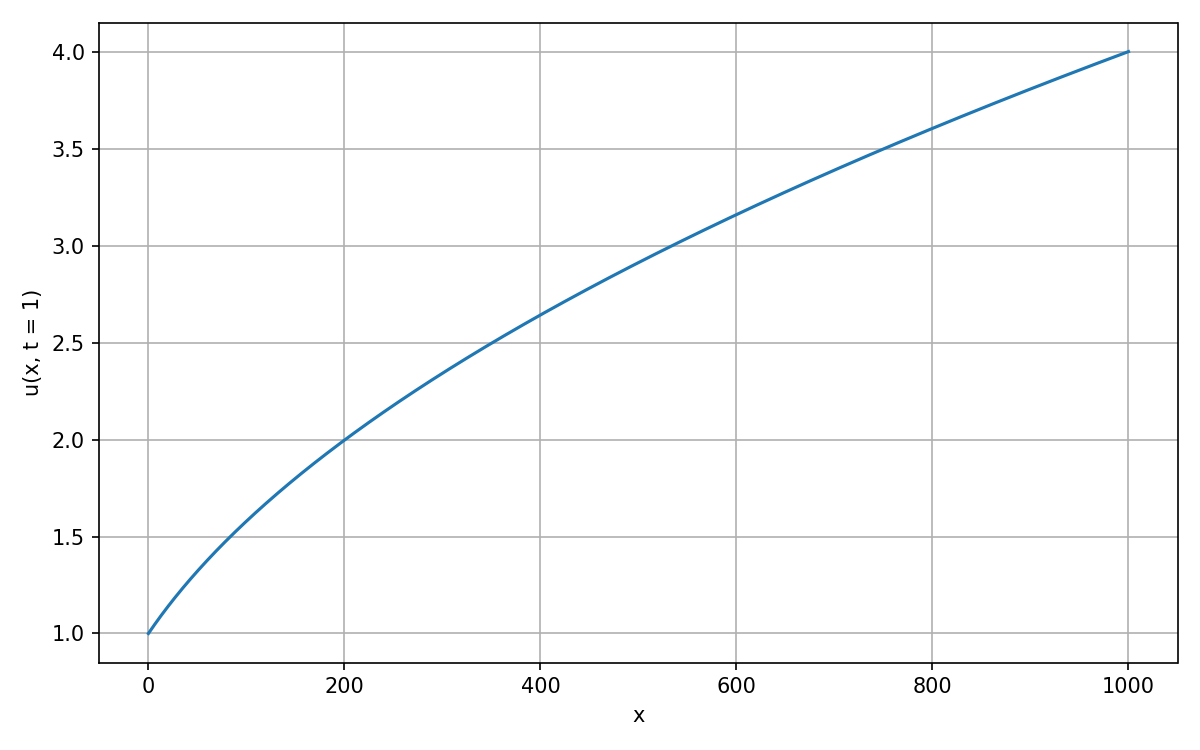

In [50]:
x = np.linspace(0, Nx, Nx + 1)

plt.figure(figsize = [8, 5])
plt.plot(x, data[Nt - 1])
plt.xlabel("x")
plt.ylabel("u(x, t = 1)")
plt.tight_layout() 
plt.grid()
plt.show()